The following code is from
[Link](https://github.com/justinbois/rdsolver/blob/master/notebooks/asdm_example.ipynb)

In [1]:
import numpy as np
import numba
import scipy.integrate
from matplotlib import pyplot as plt

import rdsolver

In [2]:
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

In [3]:
D

array([0.005, 0.2  ])

In [4]:
beta

array([0.  , 0.02])

In [5]:
gamma

array([[-0.01,  0.  ],
       [ 0.  ,  0.  ]])

In [6]:
#f()
# rho_a, rho_s, kappa_a
f_args

(0.01, 0.02, 0.25)

In [7]:
homo_ss

array([1.  , 1.25])

In [60]:
# Load a standard ASDM model
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

# Set up the space and time grid
n = (32, 32)
L = (50, 50)
t = np.linspace(0, 2*50000, 2*512)

# Include the estimated params
D[0] = 0.005 # D_a
D[1] = 1.000000013351432e-10 # D_s
beta[0] = 0# sigma_a
beta[1] = 0.0002879730600398034# sigma_s
gamma[0,0] = 0.0 #mu_a
gamma[1,1] = 0.0 #mu_s
# rho_a,  rho_s, kappa_a
f_args = (0.0, 0.2, 86.74993133544922 )


# Initial condition and solve
c0 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
c = rdsolver.solve(c0, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
c_interp = rdsolver.viz.interpolate_concs(c)



  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 2/1024 [00:00<07:04,  2.41it/s]

  0%|          | 3/1024 [00:01<06:06,  2.78it/s]

  0%|          | 4/1024 [00:01<05:22,  3.16it/s]

  0%|          | 5/1024 [00:01<04:44,  3.59it/s]

  1%|          | 6/1024 [00:01<04:09,  4.08it/s]

  1%|          | 7/1024 [00:01<03:36,  4.69it/s]

  1%|          | 8/1024 [00:02<03:07,  5.42it/s]

  1%|          | 9/1024 [00:02<02:41,  6.29it/s]

  1%|          | 11/1024 [00:02<02:00,  8.44it/s]

  1%|▏         | 14/1024 [00:02<01:22, 12.26it/s]

  2%|▏         | 19/1024 [00:02<00:48, 20.72it/s]

  5%|▍         | 49/1024 [00:02<00:10, 88.77it/s]

  9%|▉         | 95/1024 [00:02<00:05, 184.21it/s]

 14%|█▍        | 141/1024 [00:02<00:03, 257.43it/s]

 18%|█▊        | 187/1024 [00:02<00:02, 312.59it/s]

 23%|██▎       | 233/1024 [00:02<00:02, 353.29it/s]

 27%|██▋       | 279/1024 [00:03<00:01, 382.43it/s]

 32%|███▏      | 325/1024 [00:03<00:01, 403.37it/s]

 36%|███▌      | 370/1024 [00:03<00

In [8]:
#with open('../turing.npy', 'wb') as f:
#    np.save(f, c)
    
#with open('../turing_t.npy', 'wb') as f:
#    np.save(f, t)
   

1024

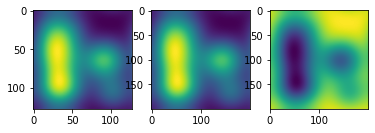

In [57]:
# Direct solution
index = 512#len(t)-1
plt.subplot(131)
plt.imshow(c[0, :,:,index])
# Interpolated solutions
plt.subplot(132)
plt.imshow(c_interp[0, :,:,index])
plt.subplot(133)
plt.imshow(c_interp[1, :,:,index])
plt.show()

In [54]:
np.max(c_interp[1, :,:,index]) - np.min(c_interp[1, :,:,index])

1.8717622427000258e-07

### Making an animation

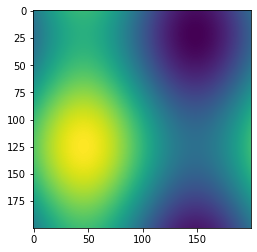

In [53]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()

im=plt.imshow((c_interp[0, :,:,0]- np.min(c_interp[0, :,:,0]))/(np.max(c_interp[0, :,:,0]) - np.min(c_interp[0, :,:,0])))#  ,interpolation='none')
def init():
    im.set_data((c_interp[0, :,:,0]- np.min(c_interp[0, :,:,0]))/(np.max(c_interp[0, :,:,0]) - np.min(c_interp[0, :,:,0])))
    return [im]
    
def animate(i):    
    a=im.get_array()
    a=c_interp[0, :,:,i] 
    im.set_data((c_interp[0, :,:,i]- np.min(c_interp[0, :,:,i])) /(np.max(c_interp[0, :,:,i]) - np.min(c_interp[0, :,:,i])))
    return [im]

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=25, blit=True)


anim.save('turring_2.gif', writer='imagemagick')

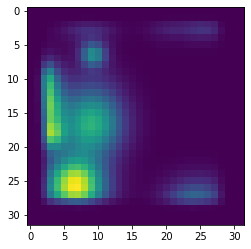

In [40]:
plt.imshow(c[0, :,:,0])
plt.show()

In [19]:
8000/(32*256)

0.9765625